# **Moneyball Dataset**

Concepts:

* Feature Engineering
* EDA
* Data Cleaning (DropNA, Median, Mean)
* Linear Regression
* Predicting Value


In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
import scipy.stats as stats
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

Description: Baseball Dataset:

* RA = Runs Allowed
* RS = Runs Scored
* OBG = On Base Percentage
* SLG = Slugging Percentage (Measure of batting productivity of hitter: calculated by: total bases / at bats)

* BA = Batting Average
* OOBP = Opponent's OBP
* OSLG = Opponent's SLG
* W = No. of wins in that season

In [2]:
bb  = pd.read_csv('baseball.csv')
bb.head()

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG
0,ARI,NL,2012,734,688,81,0.328,0.418,0.259,0,NaN,NaN,162,0.317,0.415
1,ATL,NL,2012,700,600,94,0.320,0.389,0.247,1,4.0,5.0,162,0.306,0.378
2,BAL,AL,2012,712,705,93,0.311,0.417,0.247,1,5.0,4.0,162,0.315,0.403
3,BOS,AL,2012,734,806,69,0.315,0.415,0.260,0,NaN,NaN,162,0.331,0.428
4,CHC,NL,2012,613,759,61,0.302,0.378,0.240,0,NaN,NaN,162,0.335,0.424


In [3]:
bb.shape

(1232, 15)

In [4]:
bb.corr()

,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG
Year,1.000000,0.418978,0.412020,0.004138,0.374354,0.536037,0.349397,0.145779,0.385219,0.443967,0.009287,-0.371869,-0.345667
RS,0.418978,1.000000,0.380139,0.511745,0.900492,0.918740,0.827000,0.386628,-0.027687,0.210963,0.075195,0.133981,0.193426
RA,0.412020,0.380139,1.000000,-0.532394,0.326360,0.436527,0.330764,-0.261477,0.399141,0.315128,-0.023369,0.910344,0.909319
W,0.004138,0.511745,-0.532394,1.000000,0.481836,0.401496,0.408716,0.616757,-0.755098,-0.198960,0.105309,-0.634315,-0.568490
OBP,0.374354,0.900492,0.326360,0.481836,1.000000,0.790910,0.851958,0.363890,0.001612,0.175349,0.016563,0.120349,0.153372
SLG,0.536037,0.918740,0.436527,0.401496,0.790910,1.000000,0.790481,0.324713,0.126663,0.271893,0.036770,0.143861,0.210423
BA,0.349397,0.827000,0.330764,0.408716,0.851958,0.790481,1.000000,0.290217,0.035452,0.092684,0.019886,0.187108,0.227808
Playoffs,0.145779,0.386628,-0.261477,0.616757,0.363890,0.324713,0.290217,1.000000,NaN,NaN,0.022208,-0.433572,-0.366744
RankSeason,0.385219,-0.027687,0.399141,-0.755098,0.001612,0.126663,0.035452,NaN,1.000000,0.266906,0.069222,0.097731,0.050111
RankPlayoffs,0.443967,0.210963,0.315128,-0.198960,0.175349,0.271893,0.092684,NaN,0.266906,1.000000,0.007820,0.065808,0.087089


In [5]:
# Creating a new column called RD (Runs Difference) by Runs Scored - Runs Allowed

bb['RD'] = bb['RS'] - bb['RA']
bb.head(3)

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG,RD
0,ARI,NL,2012,734,688,81,0.328,0.418,0.259,0,NaN,NaN,162,0.317,0.415,46
1,ATL,NL,2012,700,600,94,0.320,0.389,0.247,1,4.0,5.0,162,0.306,0.378,100
2,BAL,AL,2012,712,705,93,0.311,0.417,0.247,1,5.0,4.0,162,0.315,0.403,7


In [6]:
bb.corr()

,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG,RD
Year,1.000000e+00,0.418978,0.412020,0.004138,0.374354,0.536037,0.349397,0.145779,0.385219,0.443967,0.009287,-0.371869,-0.345667,2.182660e-18
RS,4.189775e-01,1.000000,0.380139,0.511745,0.900492,0.918740,0.827000,0.386628,-0.027687,0.210963,0.075195,0.133981,0.193426,5.462938e-01
RA,4.120202e-01,0.380139,1.000000,-0.532394,0.326360,0.436527,0.330764,-0.261477,0.399141,0.315128,-0.023369,0.910344,0.909319,-5.670477e-01
W,4.138248e-03,0.511745,-0.532394,1.000000,0.481836,0.401496,0.408716,0.616757,-0.755098,-0.198960,0.105309,-0.634315,-0.568490,9.378511e-01
OBP,3.743545e-01,0.900492,0.326360,0.481836,1.000000,0.790910,0.851958,0.363890,0.001612,0.175349,0.016563,0.120349,0.153372,5.063794e-01
SLG,5.360371e-01,0.918740,0.436527,0.401496,0.790910,1.000000,0.790481,0.324713,0.126663,0.271893,0.036770,0.143861,0.210423,4.228647e-01
BA,3.493972e-01,0.827000,0.330764,0.408716,0.851958,0.790481,1.000000,0.290217,0.035452,0.092684,0.019886,0.187108,0.227808,4.369427e-01
Playoffs,1.457787e-01,0.386628,-0.261477,0.616757,0.363890,0.324713,0.290217,1.000000,NaN,NaN,0.022208,-0.433572,-0.366744,5.810944e-01
RankSeason,3.852191e-01,-0.027687,0.399141,-0.755098,0.001612,0.126663,0.035452,NaN,1.000000,0.266906,0.069222,0.097731,0.050111,-5.806451e-01
RankPlayoffs,4.439670e-01,0.210963,0.315128,-0.198960,0.175349,0.271893,0.092684,NaN,0.266906,1.000000,0.007820,0.065808,0.087089,-1.312351e-01


This dataset spans across multiple years the idea is to replicate the results in the year 2002, we will only do the analysis on data before 2002. 

In [7]:
df = bb[bb['Year']<2002]
df.head()

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG,RD
330,ANA,AL,2001,691,730,75,0.327,0.405,0.261,0,NaN,NaN,162,0.331,0.412,-39
331,ARI,NL,2001,818,677,92,0.341,0.442,0.267,1,5.0,1.0,162,0.311,0.404,141
332,ATL,NL,2001,729,643,88,0.324,0.412,0.260,1,7.0,3.0,162,0.314,0.384,86
333,BAL,AL,2001,687,829,63,0.319,0.380,0.248,0,NaN,NaN,162,0.337,0.439,-142
334,BOS,AL,2001,772,745,82,0.334,0.439,0.266,0,NaN,NaN,161,0.329,0.393,27


In [8]:
df.shape

(902, 16)

#**EDA**

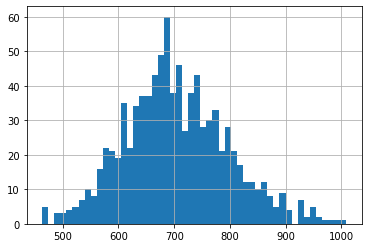

In [9]:
df['RS'].hist(bins = 50)

#Normal Distribtution

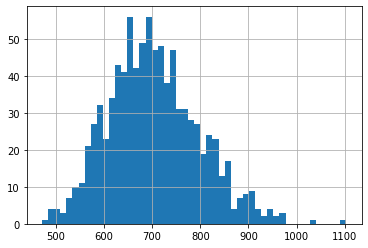

In [10]:
df['RA'].hist(bins = 50)

#Normal Distribtution

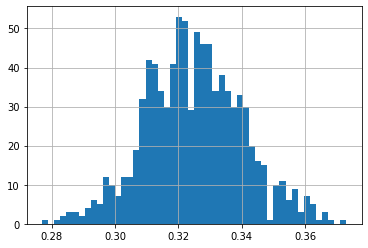

In [11]:
df['OBP'].hist(bins = 50)

#Normal Distribtution

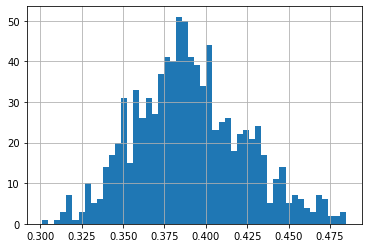

In [12]:
df['SLG'].hist(bins = 50)

#Normal Distribution

In [13]:
#Divide the dataset into teams which made the playsoffs

df_playoff = df.groupby('Playoffs')
df_playoff_0 = df_playoff.get_group(0)
df_playoff_1 = df_playoff.get_group(1)

In [14]:
df_playoff_0.head()

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG,RD
330,ANA,AL,2001,691,730,75,0.327,0.405,0.261,0,NaN,NaN,162,0.331,0.412,-39
333,BAL,AL,2001,687,829,63,0.319,0.380,0.248,0,NaN,NaN,162,0.337,0.439,-142
334,BOS,AL,2001,772,745,82,0.334,0.439,0.266,0,NaN,NaN,161,0.329,0.393,27
335,CHC,NL,2001,777,701,88,0.336,0.430,0.261,0,NaN,NaN,162,0.321,0.398,76
336,CHW,AL,2001,798,795,83,0.334,0.451,0.268,0,NaN,NaN,162,0.334,0.427,3


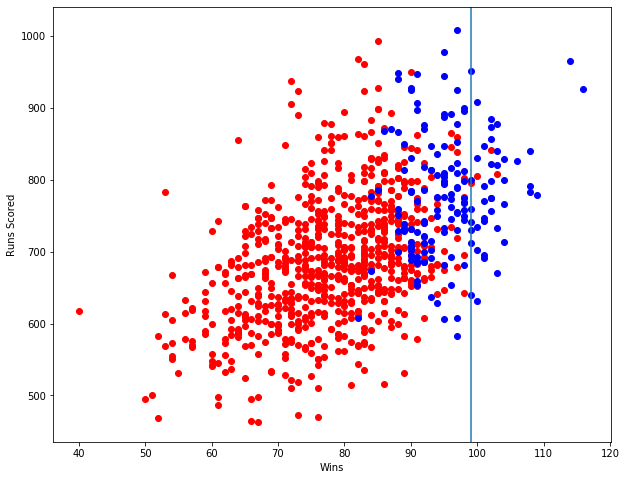

In [15]:
 # Plot Scatterplot Wins vs. Runs Scored

plt.figure(figsize=(10,8))
plt.scatter(x = df_playoff_0['W'], y = df_playoff_0['RS'], c = 'red')
plt.scatter(x = df_playoff_1['W'], y = df_playoff_1['RS'], c = 'blue')
plt.xlabel('Wins')
plt.ylabel('Runs Scored')
plt.axvline(x = 99) # estimate the Min number of matches to win to reach playoffs
plt.show()

Depodesta has estimated that 99 wins are required to make it to the playoffs and that seems to be appropriate as there are only 3 red points after that threshold which haven't made it to the playoffs with wins above 99. 



Depodesta has also calculated the score to be atleast 814 runs and allow 645 runs in order to make it to the playoffs. The runs difference (RD) column which was calculated should be approximately 169. Let's plot the relationship between RD and Wins.

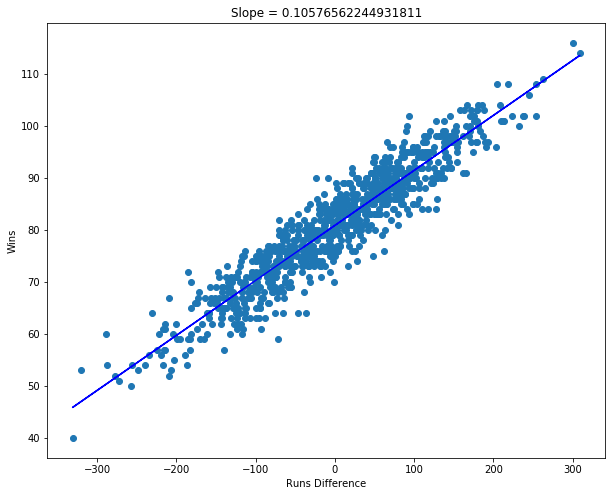

In [16]:
 plt.figure(figsize = (10,8))
 
 x = np.array(df.RD)
 y = np.array(df.W) #deriving slope, intercept values

 slope, intercept = np.polyfit(x,y,1)
 abline_values = [slope * i + intercept for i in x] #plotting the figueplt.figure(figsized = 10,8)
 plt.scatter(x,y)
 plt.plot(x , abline_values, 'b')
 plt.title('Slope = %s' % (slope))
 plt.xlabel('Runs Difference')
 plt.ylabel('Wins')
 plt.show()

Strong positive correlation, as Runs Difference increases the wins also increase.

In [17]:
print(np.corrcoef(x,y))

# Correlation between Runs Difference and Wins, 0.935 is a very highly positive correalation

[[1.         0.93851498]
 [0.93851498 1.        ]]


Equation:

Wins = B0 + B1*(RD)

RD  = RS - RA

* In production environment: we have to properly estimate Runs Scored (RS) and Runs Allowed (RA). In order to correctly estimate RS and RA we need to find out the appropriate variables which will help me sucessfully estimate RS and RA. 

* RS = B0 + B1*?
* RA = B0 + B1*?

Runs Scored (RS): OBP, SLG, and AVG are string indicators of runs scored by the particular team. Let's validate these assumptions by plotting the relationship between these variables with RS. 

Scatterplot to check the relations

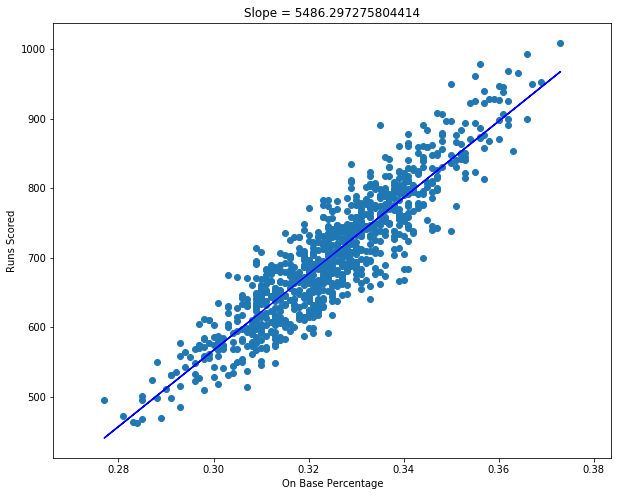

In [18]:
#OBP vs RS

plt.figure(figsize = (10,8))
 
x = np.array(df.OBP)
y = np.array(df.RS) #deriving slope, intercept values

slope, intercept = np.polyfit(x,y,1)
abline_values = [slope * i + intercept for i in x] #plotting the figueplt.figure(figsized = 10,8)
plt.scatter(x,y)
plt.plot(x , abline_values, 'b') 
plt.title('Slope = %s' % (slope))
plt.xlabel('On Base Percentage')
plt.ylabel('Runs Scored')
plt.show()

In [19]:
print(np.corrcoef(x,y))

#High correlation of 0.904 between OBP vs RS

[[1.         0.90490915]
 [0.90490915 1.        ]]


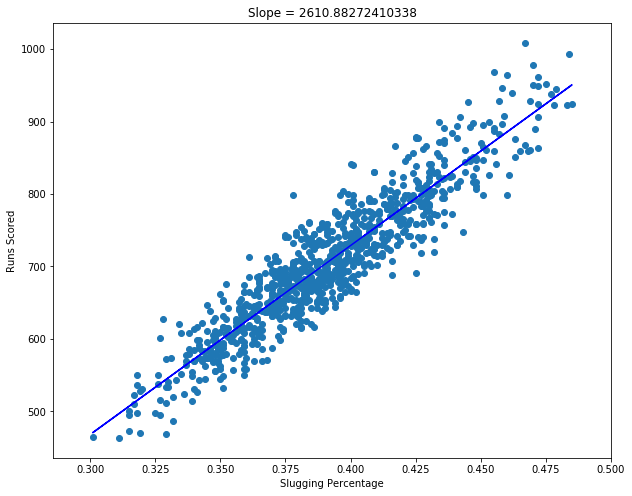

In [20]:
# SLG vs RS

plt.figure(figsize = (10,8))
 
x = np.array(df.SLG)
y = np.array(df.RS) #deriving slope, intercept values

slope, intercept = np.polyfit(x,y,1)
abline_values = [slope * i + intercept for i in x] #plotting the figueplt.figure(figsized = 10,8)
plt.scatter(x,y)
plt.plot(x , abline_values, 'b') 
plt.title('Slope = %s' % (slope))
plt.xlabel('Slugging Percentage')
plt.ylabel('Runs Scored')
plt.show()

In [21]:
print(np.corrcoef(x,y))

#High correlation of 0.926 between SLG and RS

[[1.         0.92638433]
 [0.92638433 1.        ]]


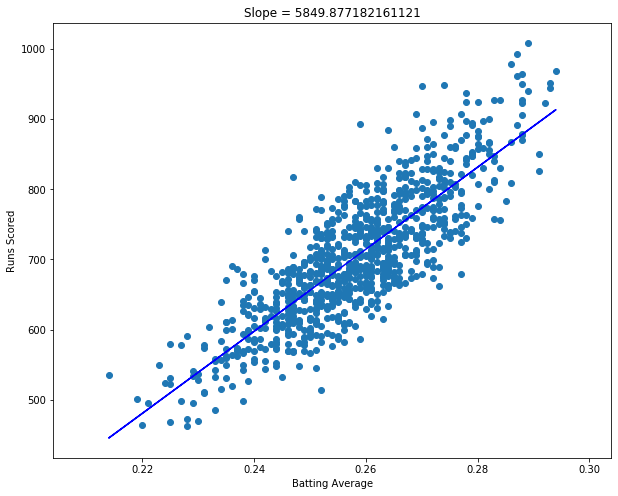

In [22]:
#BA vs RS

plt.figure(figsize = (10,8))
 
x = np.array(df.BA)
y = np.array(df.RS) #deriving slope, intercept values

slope, intercept = np.polyfit(x,y,1)
abline_values = [slope * i + intercept for i in x] #plotting the figueplt.figure(figsized = 10,8)
plt.scatter(x,y)
plt.plot(x , abline_values, 'b') 
plt.title('Slope = %s' % (slope))
plt.xlabel('Batting Average')
plt.ylabel('Runs Scored')
plt.show()

In [23]:
print(np.corrcoef(x,y))

#High correlation BA vs RS

[[1.         0.83162475]
 [0.83162475 1.        ]]


Similarly, we can hypothesise that OOBP (Opponent's OBP) and OSLG (Opponent's SLG) have a similar relationship with RA (Runs Allowed). 

#**Model Building**

Looks like we have some null values so let's try two approaches and see which will yield the best result:

1. Drop NA
2. Median



# **1. Drop NA**

In [24]:
bb  = pd.read_csv('baseball.csv')
bb['RD'] = bb['RS'] - bb['RA']
df = bb[bb['Year']<2002]
df.head(2)

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG,RD
330,ANA,AL,2001,691,730,75,0.327,0.405,0.261,0,NaN,NaN,162,0.331,0.412,-39
331,ARI,NL,2001,818,677,92,0.341,0.442,0.267,1,5.0,1.0,162,0.311,0.404,141


In [25]:
for col in df:
  print(col, df[col].isnull().sum())

Team 0
League 0
Year 0
RS 0
RA 0
W 0
OBP 0
SLG 0
BA 0
Playoffs 0
RankSeason 748
RankPlayoffs 748
G 0
OOBP 812
OSLG 812
RD 0


We can see that OOBP and OSLG have 812 missing values each, let deal with this

In [26]:
df.replace([np.inf, -np.inf], np.nan, inplace = True)
df.dropna(inplace=True)

In [27]:
df.shape

(24, 16)

In [28]:
df

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG,RD
331,ARI,NL,2001,818,677,92,0.341,0.442,0.267,1,5.0,1.0,162,0.311,0.404,141
332,ATL,NL,2001,729,643,88,0.324,0.412,0.260,1,7.0,3.0,162,0.314,0.384,86
338,CLE,AL,2001,897,821,91,0.350,0.458,0.278,1,6.0,4.0,162,0.341,0.417,76
342,HOU,NL,2001,847,769,93,0.347,0.451,0.271,1,4.0,4.0,162,0.325,0.437,78
349,NYY,AL,2001,804,713,95,0.334,0.435,0.267,1,3.0,2.0,161,0.318,0.398,91
350,OAK,AL,2001,884,645,102,0.345,0.439,0.264,1,2.0,4.0,162,0.308,0.380,239
354,SEA,AL,2001,927,627,116,0.360,0.445,0.288,1,1.0,3.0,162,0.301,0.378,300
356,STL,NL,2001,814,684,93,0.339,0.441,0.270,1,4.0,4.0,162,0.328,0.428,130
362,ATL,NL,2000,810,714,95,0.346,0.429,0.271,1,2.0,4.0,162,0.319,0.402,96
366,CHW,AL,2000,978,839,95,0.356,0.470,0.286,1,2.0,4.0,162,0.346,0.434,139


Running LinearRegression Model

We are using on-base percentage (OBP) and slugging rate (SLG) as independent variables to predict Runs Scored (RS). Batting Average (BA) also has high correlation with RS but we are skipping that in the model because BA and SLG are similar and this will cause a multi-collineary issue in our model. For that reason we are not taking BA. 

In [29]:
from sklearn.linear_model import LinearRegression

# Extracting variables from the dataframe

x = df[['OBP', 'SLG']].values
y = df[['RS']].values # Calling our model object

RS_model = LinearRegression() 
RS_model.fit(x,y)               # Fitting the model

# Printing model intercept and coefficients

print(RS_model.intercept_)
print(RS_model.coef_)

[-1063.22544751]
[[2724.40798084 2190.91660661]]


Equation of model: 

RS = -804.627 + 2737.77 * (OBP) + 1584.91 * (SLG)

In [30]:
 RS_model.score(x,y)

0.8554598943748477

Let's run the model for Runs Allowed (RA) using opponents on-base percentage (OOBP) and opponent's slugging percentage as independent variables. 

In [31]:
from sklearn.linear_model import LinearRegression

# Extracting variables from the dataframe

x = df[['OOBP', 'OSLG']].values
y = df[['RA']].values # Calling our model object

RA_model = LinearRegression() 
RA_model.fit(x,y)               # Fitting the model

# Printing model intercept and coefficients

print(RA_model.intercept_)
print(RA_model.coef_)

[-775.16234861]
[[3225.00378812 1106.50390975]]


Equation of model: 

RA = -435.85 + -2234.364 * (OOBP) + 4576.41 * (OSLG)

In [32]:
from sklearn.linear_model import LinearRegression

# Extracting variables from the dataframe

x = df[['RD']].values
y = df[['W']].values # Calling our model object

W_model = LinearRegression() 
W_model.fit(x,y)               # Fitting the model

# Printing model intercept and coefficients

print(W_model.intercept_)
print(W_model.coef_)

[84.09190385]
[[0.08469339]]


In [33]:
W_model.score(x,y)

0.7323787583365337

In [34]:
print(df['OOBP'].mean())
print(df['OOBP'].median())

0.327875
0.3275


Model Prediction:

Oakland A's Statistics in 2001 before the Playoffs:

OBP: 0.339

SLG: 0.430

OOBP: 0.307

OSLG: 0.373 

Let plug these values into the above model to generate predictions:

1) RS_model(OBP,SLG)

2) RA_model(OOBP,OSLG)

3) RD = RS_predict - RA+predict

4) W_model(RD)

We will 

In [35]:
RS_model.predict([[0.339,0.430]])

array([[802.44299884]])

In [36]:
RA_model.predict([[0.307,0.373]])

array([[627.63977268]])

In [37]:
804.98699884 - 627.63977268

177.34722616

In [38]:
W_model.predict([[177.34722616]])

array([[99.11204101]])

Actual is 103, our results are close. This deviation is due to high level imputation done for missing values.

# 2) Median Imputation

In [39]:
bb1  = pd.read_csv('baseball.csv')
bb1.head(2)

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG
0,ARI,NL,2012,734,688,81,0.328,0.418,0.259,0,NaN,NaN,162,0.317,0.415
1,ATL,NL,2012,700,600,94,0.320,0.389,0.247,1,4.0,5.0,162,0.306,0.378


In [40]:
bb1['RD'] = bb1['RS'] - bb1['RA']

In [41]:
df = bb1[bb1['Year']<2002]
df.head(2)

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG,RD
330,ANA,AL,2001,691,730,75,0.327,0.405,0.261,0,NaN,NaN,162,0.331,0.412,-39
331,ARI,NL,2001,818,677,92,0.341,0.442,0.267,1,5.0,1.0,162,0.311,0.404,141


In [42]:
print(df['OOBP'].mean())
print(df['OOBP'].median())

0.3404777777777778
0.342


In [43]:
df['OSLG'].fillna((df['OSLG'].median()), inplace=True)
df['OOBP'].fillna((df['OOBP'].median()), inplace=True)

In [44]:
print(df['OOBP'].mean())
print(df['OOBP'].median())

0.3418481152993372
0.342


In [45]:
for col in df.columns:
  df[col] = df[col].fillna(df[col].sample(random_state = 0).iloc[0]) #It dropping the null values and randomly picking a record (.sample()) and it will only take the value and not the index (.iloc[0])#

In [46]:
from sklearn.linear_model import LinearRegression

# Extracting variables from the dataframe

x = df[['OBP', 'SLG']].values
y = df[['RS']].values # Calling our model object

RS_model = LinearRegression() 
RS_model.fit(x,y)               # Fitting the model

# Printing model intercept and coefficients

print(RS_model.intercept_)
print(RS_model.coef_)

[-804.62706106]
[[2737.76802227 1584.90860546]]


In [47]:
from sklearn.linear_model import LinearRegression

# Extracting variables from the dataframe

x = df[['OOBP', 'OSLG']].values
y = df[['RA']].values # Calling our model object

RA_model = LinearRegression() 
RA_model.fit(x,y)               # Fitting the model

# Printing model intercept and coefficients

print(RA_model.intercept_)
print(RA_model.coef_)

[-691.10071362]
[[1015.13392078 2422.86337262]]


In [48]:
from sklearn.linear_model import LinearRegression

# Extracting variables from the dataframe

x = df[['RD']].values
y = df[['W']].values # Calling our model object

W_model = LinearRegression() 
W_model.fit(x,y)               # Fitting the model

# Printing model intercept and coefficients

print(W_model.intercept_)
print(W_model.coef_)

[80.88137472]
[[0.10576562]]


Let's predict the number of wins required

In [49]:
RS_model.predict([[0.339,0.430]])

array([[804.98699884]])

In [50]:
RA_model.predict([[0.307,0.373]])

array([[524.27343805]])

In [51]:
804.98699884 - 524.27343805 #Run Difference = Runs Scored - Runs Allowed

280.71356079

In [52]:
W_model.predict([[280.71356079]])

array([[110.57121921]])

Dropping the null values has given better results than median imputation because median imputation won't be effective if the percentage of null value is greater than 8% to 9%

# 3) Mean Imputation

In [53]:
bb2  = pd.read_csv('baseball.csv')
bb2.head(2)

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG
0,ARI,NL,2012,734,688,81,0.328,0.418,0.259,0,NaN,NaN,162,0.317,0.415
1,ATL,NL,2012,700,600,94,0.320,0.389,0.247,1,4.0,5.0,162,0.306,0.378


In [54]:
bb2['RD'] = bb2['RS'] - bb2['RA']

In [55]:
df = bb2[bb2['Year']<2002]
df.head(2)

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG,RD
330,ANA,AL,2001,691,730,75,0.327,0.405,0.261,0,NaN,NaN,162,0.331,0.412,-39
331,ARI,NL,2001,818,677,92,0.341,0.442,0.267,1,5.0,1.0,162,0.311,0.404,141


In [56]:
print(df['OOBP'].mean())
print(df['OOBP'].median())

0.3404777777777778
0.342


In [57]:
df['OSLG'].fillna((df['OSLG'].mean()), inplace=True)
df['OOBP'].fillna((df['OOBP'].mean()), inplace=True)

In [58]:
print(df['OOBP'].mean())
print(df['OOBP'].median())

0.34047777777777805
0.3404777777777778


In [59]:
from sklearn.linear_model import LinearRegression

# Extracting variables from the dataframe

x = df[['OBP', 'SLG']].values
y = df[['RS']].values # Calling our model object

RS_model = LinearRegression() 
RS_model.fit(x,y)               # Fitting the model

# Printing model intercept and coefficients

print(RS_model.intercept_)
print(RS_model.coef_)

[-804.62706106]
[[2737.76802227 1584.90860546]]


In [60]:
from sklearn.linear_model import LinearRegression

# Extracting variables from the dataframe

x = df[['OOBP', 'OSLG']].values
y = df[['RA']].values # Calling our model object

RA_model = LinearRegression() 
RA_model.fit(x,y)               # Fitting the model

# Printing model intercept and coefficients

print(RA_model.intercept_)
print(RA_model.coef_)

[-943.13524264]
[[2913.59948582 1514.28595842]]


In [61]:
from sklearn.linear_model import LinearRegression

# Extracting variables from the dataframe

x = df[['RD']].values
y = df[['W']].values # Calling our model object

W_model = LinearRegression() 
W_model.fit(x,y)               # Fitting the model

# Printing model intercept and coefficients

print(W_model.intercept_)
print(W_model.coef_)

[80.88137472]
[[0.10576562]]


Predict the values

In [62]:
RS_model.predict([[0.339,0.430]])

array([[804.98699884]])

In [63]:
RA_model.predict([[0.307,0.373]])

array([[516.16846199]])

In [64]:
804.98699884-516.16846199

288.81853685

In [65]:
W_model.predict([[288.81853685]])

array([[111.42844705]])

Due to the high amounts of null values the mean and median imputation has yielded us poor results in terms of predicting the wins to make it to the playoffs. Looks the sample of 24 records yielded us the best results. 